## This is the second work from "Data Analysis with Python Course with Nevin Yılmaz". In this work I analysed the sales of superstore that  mostly sells office supplies in USA.

# Quick look to the data <a id="introduction"></a>
This dataset is  from the course that I mentioned in above. The purpose of the dataset is to have insight of superstore'sales. In this dataset our target variable is "Sales".
# Data Exploration <a id="subparagraph1"></a>
The columns that are given in dataset some of them are self-explanatory so I did not write explanation

***Row ID:*** 

***Order ID:***

***Order Date:*** 

***Ship Date:***

***Ship Mode:*** Different ship mode, First Class, Same day, Standard Class, Third Class.

***Customer ID:***

***Customer Name:***

***Segment:*** Different segments for company, Consumer, Corporate, Home Office.

***Country:*** USA

***City:*** Different cities in the USA, New york, Los Angeles, Philadelphia etc.

***State:*** Different states in the USA, Kentucky, California, Folrida etc.

***Postal Code:***

***Region:*** Different region in the USA, West, South, Central, East.

***Product ID:***

***Category:*** Mostly Office supplies then furniture and technology.

***Sub-Category:***

***Product Name:***


***Target variable:*** Sales

# Questions to be answered <a id="paragraph1"></a>

* What day of the week are our sales high on average?

* What is monthly average sales?

* What are the year over growth year/ total sales over the years?

* Who are the top customer of all times?

* What are the highest sales by category?

* Which city does have the highest sales?

In [1]:
from datetime import timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('Super_Store_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import pandas as pd

# Specify the encoding explicitly
data = pd.read_csv("Super_Store_data.csv", encoding='latin1')

# Display the first few rows of the DataFrame


In [6]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [4]:
data.info()
#It is a method that I can use to get general information about dataset(column's name, feature's type) and check if there is any missing information in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [4]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
#Here, I changed the column's type "object" to datetime by using "datetime" module in pandas.

In [5]:
data.describe().T
#It is the method that I use to obtain statistical informations for numerical columns.

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [6]:
data.columns
#It is the method that I can use to get the column's name in a list format.

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [7]:
category_columns = []
for sutun in data.columns:
 if data[sutun].dtypes == 'object':
   category_columns.append(sutun)
#I created category_columns list to observe the category columns features.

In [8]:
data[category_columns].describe()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [9]:
data['Order Date'] #A series can have only one column in pandas so I used one bracket.

0      2017-08-11
1      2017-08-11
2      2017-12-06
3      2016-11-10
4      2016-11-10
          ...    
9795   2017-05-21
9796   2016-12-01
9797   2016-12-01
9798   2016-12-01
9799   2016-12-01
Name: Order Date, Length: 9800, dtype: datetime64[ns]

In [12]:
data[['Order Date', 'Ship Date']].describe().T
# Here I want to choose two columns from dataframe so I have to use two bracket.

,count,unique,top,freq,first,last
Order Date,9800,1230,2017-05-09,38,2015-01-02,2018-12-30
Ship Date,9800,1326,2018-09-26,34,2015-01-04,2019-05-01


In [13]:
for column in category_columns:
  print(column)
  print(data[column].value_counts())
  print('END')
  print("")
  #This method gives us to total information about each column's count

Order ID
CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: Order ID, Length: 4922, dtype: int64
END

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64
END

Customer ID
WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
CK-12205    32
            ..
JR-15700     1
CJ-11875     1
SC-20845     1
RE-19405     1
AO-10810     1
Name: Customer ID, Length: 793, dtype: int64
END

Customer Name
William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Anthony O'Donnell       1
Name: Customer Name, Length: 793, dtype: int64
E

# Feature Engineering & Data Cleaning <a id="paragraph2"></a>

In this part of I found some missing value. The values that does not sound logical according to Data Exploration. For me I found some outlier values. I tried to reshape these values. For example filling the correspondig column with median and mean values. I take out some of these values in my dataset. I will explain these steps clearly so don't worry. 😉😎

In [14]:
data['Shipping_timeframe'] = data['Ship Date'] -data['Order Date']
data.head()
#I want to find the shipping timeframe and check the validity.
#I saw that there are negative values but it is not logical.

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92 days
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92 days
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173 days
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23 days
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23 days


In [15]:
data['Shipping_timeframe'].dtypes
# It is a method to get the type of columns.

data['Shipping_timeframe'].astype('str').str.split(expand=True)
#It is a method to convert column's type to string.

data[['Shipping_timeframe', '_']] = data['Shipping_timeframe'].astype('str').str.split(expand=True)
#I add new column "_" to get rid of the string format of "days" column.

In [16]:
data['Shipping_timeframe'].dtypes # Type of object is object.

dtype('O')

In [17]:
data['Shipping_timeframe'] =data['Shipping_timeframe'].astype(int) 
data['Shipping_timeframe'].dtypes
#I converted to type of column's integer because I want to calculations next steps.

dtype('int64')

In [18]:
data.drop('_', axis=1, inplace=True) 
#It is a method to delete the column in dataset. inplace=True, is that  applies this  permananet changes on dataset.

In [19]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23


In [20]:
data[data['Shipping_timeframe'] < 0]
#I said that it is not logical to have negative values in this column but I have what should I do?

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23
5,6,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,-84
6,7,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,-84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9790,9791,CA-2018-144491,2018-03-27,2018-01-04,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",211.2460,-82
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,-319
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,-319
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,-319


In [21]:
data[['Shipping_timeframe']][data['Shipping_timeframe'] >= 0].describe()
#I chose the positive values for this column and looked the statistical information.

,Shipping_timeframe
count,8116.000000
mean,41.726836
std,58.037943
min,0.000000
25%,4.000000
50%,5.000000
75%,89.000000
max,214.000000


In [22]:
data_big = data[data['Shipping_timeframe'] >= 0] 

#I created new dataframe "data_big" by choosing positive values of  'Shipping_timeframe'.
#Because, for next steps I will use "data_big"s mean and median values.

data_big.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,92
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,92
12,13,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,5
13,14,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,153
14,15,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,4


In [23]:
data_big["Ship Mode"].unique() # It is a method to get unique values of given column.

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [24]:
data_big.groupby('Ship Mode').agg({'Shipping_timeframe':'mean'})

,Shipping_timeframe
Ship Mode,
First Class,26.311756
Same Day,0.891791
Second Class,36.224796
Standard Class,52.805130


In [25]:
  data_big.groupby('Ship Mode').agg({'Shipping_timeframe':'median'})

,Shipping_timeframe
Ship Mode,
First Class,3.0
Same Day,0.0
Second Class,4.0
Standard Class,6.0


In [26]:
#For the next steps;
#If shipping time frame is less than zero, look at the shipping mode of that row then
#Look at the median value of this shipping mode and fill the shipping time frame that is less than zero with this median value.

In [27]:
ship_mode_dic = {"Standard Class":6,
                 "Second Class":4, 
                 "Same Day":0, 
                 "First Class":3}
ship_mode_dic.items()

dict_items([('Standard Class', 6), ('Second Class', 4), ('Same Day', 0), ('First Class', 3)])

In [28]:
for key, value in ship_mode_dic.items():
  data['Ship Date'] = np.where((data['Shipping_timeframe'] < 0) & (data['Ship Mode'] == key),
                             data['Order Date'] + timedelta(days=value),
                             data['Ship Date'])

In [29]:
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92
2,3,CA-2017-138688,2017-12-06,2017-12-10,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173
3,4,US-2016-108966,2016-11-10,2016-11-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23
4,5,US-2016-108966,2016-11-10,2016-11-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23


In [30]:
data['Shipping_timeframe'] = data['Ship Date'] - data['Order Date']

In [31]:
data[['Shipping_timeframe', "not_important"]] =data['Shipping_timeframe'].astype('str').str.split(expand=True)

In [32]:
data['Shipping_timeframe'] = data['Shipping_timeframe'].astype(int)

In [33]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe,not_important
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92,days
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92,days
2,3,CA-2017-138688,2017-12-06,2017-12-10,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,days
3,4,US-2016-108966,2016-11-10,2016-11-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,6,days
4,5,US-2016-108966,2016-11-10,2016-11-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,6,days


In [34]:
data[data.Shipping_timeframe < 0] 
#I checked an I no longer have data with shipping time frame less than zero.

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe,not_important


In [35]:
data.drop(['Row ID', 'Country','not_important'], 1, inplace=True ) 

In [36]:
data[data['Postal Code'].isnull()] 
#It is a method to check if I have null values.

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
2234,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,153
5274,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,62
8798,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,122
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,4
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,4
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,4
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,4
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,4
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,4


In [37]:
data[(data.City == 'Burlington') & (data.State == 'Vermont')]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
2234,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,153
5274,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,62
8798,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,122
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,4
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,4
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,4
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,4
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,4
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,4


In [38]:
data['Postal Code'] = data['Postal Code'].fillna('05402')
data[(data.City == 'Burlington') & (data.State == 'Vermont')]
#I filled with null values of Postal Code with generally a most used one.

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
2234,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,Burlington,Vermont,05402,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,153
5274,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,Burlington,Vermont,05402,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,62
8798,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,Burlington,Vermont,05402,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,122
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,05402,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,4
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,05402,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,4
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,05402,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,4
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,05402,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,05402,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,4
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,05402,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,4
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,05402,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,4


# Data visualization and story telling

In this part of this analysis, I will visualize the data to answer the questions and to understand more clearly our data that mentioned at the beginning.

# Daily sales

In [41]:
data_daily_sales = data.groupby('Order Date').agg({'Sales':"sum"}).reset_index()
#I grouped  my dataset by "Order Date" and I want that according to "Sales" sum.
data_daily_sales 

,Order Date,Sales
0,2015-01-02,468.9000
1,2015-01-03,2203.1510
2,2015-01-04,119.8880
3,2015-01-06,5188.5200
4,2015-01-07,601.0240
...,...,...
1225,2018-12-26,814.5940
1226,2018-12-27,177.6360
1227,2018-12-28,1657.3508
1228,2018-12-29,2915.5340


In [42]:
data.groupby(['Order Date', 'Ship Mode']).agg({'Sales':'sum'})
#I just want to see the "Ship Mode" and "Order Date" together.

Sales
Order Date Ship Mode                
2015-01-02 First Class      468.9000
2015-01-03 Second Class     457.5680
           Standard Class  1745.5830
2015-01-04 Second Class      46.6880
           Standard Class    73.2000
...                              ...
2018-12-28 Standard Class   589.6188
2018-12-29 First Class        6.0300
           Second Class    1814.6800
           Standard Class  1094.8240
2018-12-30 Standard Class   713.7900

[2475 rows x 1 columns]

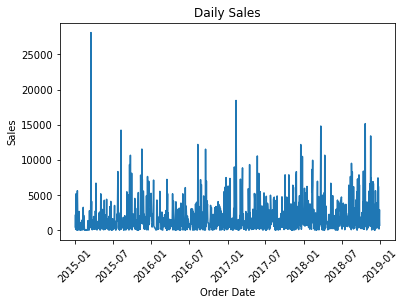

In [137]:
# fig = px.line(data_daily_sales, x='Order Date', y='Sales', title='Daily Sales')
# fig
sns.lineplot(x='Order Date', y='Sales',data=data_daily_sales).set(title="Daily Sales")
plt.xticks(rotation=45);
#Generally, using line graph is more logical for daily information.
# I can say that seasonality(christmas- black friday extc) is not included in this data as it is a store that are selling office supplies.

# Monthly sales over the years

In [44]:
data.dtypes
#Since the type of order date column is datetime, I can use pandas dt method.

Order ID                      object
Order Date            datetime64[ns]
Ship Date             datetime64[ns]
Ship Mode                     object
Customer ID                   object
Customer Name                 object
Segment                       object
City                          object
State                         object
Postal Code                   object
Region                        object
Product ID                    object
Category                      object
Sub-Category                  object
Product Name                  object
Sales                        float64
Shipping_timeframe             int32
dtype: object

In [45]:
data['year'] = data['Order Date'].dt.year
data['month'] = data['Order Date'].dt.month
data['month_year'] = str(data.month) + '-' + str(data.year)

In [46]:
for i in range(len(data)):
  data['month_year'][i] = str(data.month[i]) + "-" +str(data.year[i])

#If I want to combine two data, it is usually added as a string data type, and I add it this way.
data['month_year'] = pd.to_datetime(data['month_year'])

In [47]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe,year,month,month_year
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92,2017,8,2017-08-01
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92,2017,8,2017-08-01
2,CA-2017-138688,2017-12-06,2017-12-10,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,2017,12,2017-12-01
3,US-2016-108966,2016-11-10,2016-11-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,6,2016,11,2016-11-01
4,US-2016-108966,2016-11-10,2016-11-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,6,2016,11,2016-11-01


In [49]:
data_month_year = data.groupby(['month_year']).agg({'Sales': 'sum'}).reset_index()

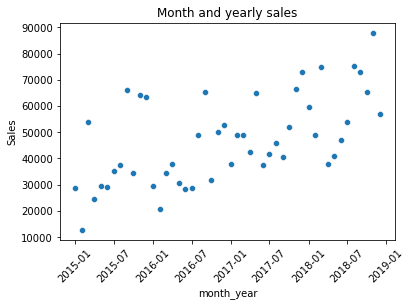

In [138]:
plt.title('Month and yearly sales')
sns.scatterplot(data=data_month_year,x='month_year', y='Sales')
plt.xticks(rotation=45);

# Monthly average sales

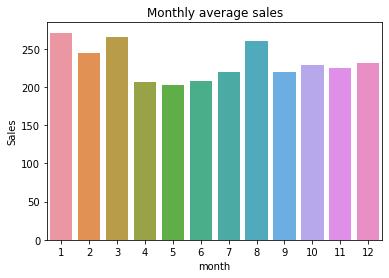

In [78]:
data_monthly_avg = data.groupby(['month']).agg({'Sales': 'mean'}).reset_index()
sns.barplot(x='month', y='Sales', data=data_monthly_avg).set(title="Monthly average sales");

# Average sales by day of the week


In [54]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe,year,month,month_year
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92,2017,8,2017-08-01
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92,2017,8,2017-08-01
2,CA-2017-138688,2017-12-06,2017-12-10,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,2017,12,2017-12-01
3,US-2016-108966,2016-11-10,2016-11-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,6,2016,11,2016-11-01
4,US-2016-108966,2016-11-10,2016-11-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,6,2016,11,2016-11-01


In [79]:
data['weekday'] = data['Order Date'].dt.day_name()
#I look at the "Order date" column using pandas dt method to find out which day the sale was made.

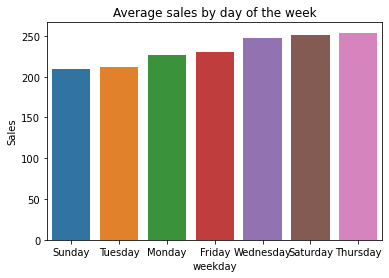

In [80]:
colorscales = px.colors.named_colorscales()
data_weekday = data.groupby(['weekday']).agg({'Sales': 'mean'}).reset_index()
data_weekday.sort_values(by='Sales', inplace=True)
sns.barplot(x='weekday', y='Sales', data=data_weekday).set(title="Average sales by day of the week");

In [81]:
data['quarter'] = data['Order Date'].dt.quarter
#It is method that obtain quarter value of chosen column.

In [82]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Shipping_timeframe,year,month,month_year,weekday,quarter
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92,2017,8,2017-08-01,Friday,3
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92,2017,8,2017-08-01,Friday,3
2,CA-2017-138688,2017-12-06,2017-12-10,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,2017,12,2017-12-01,Wednesday,4
3,US-2016-108966,2016-11-10,2016-11-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,6,2016,11,2016-11-01,Thursday,4
4,US-2016-108966,2016-11-10,2016-11-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,6,2016,11,2016-11-01,Thursday,4


<bound method Axes.bar_label of <AxesSubplot:xlabel='quarter', ylabel='Sales'>>

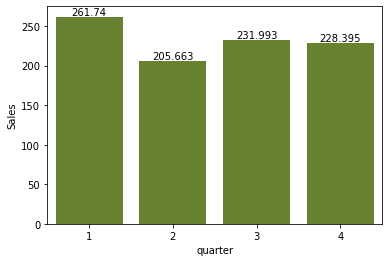

In [113]:
data_quarter = data.groupby('quarter').agg({'Sales': 'mean'}).reset_index()
ax= sns.barplot(x='quarter', y='Sales', data=data_quarter, color="olivedrab");
ax.bar_label(ax.containers[0]);

# Year over growth year/ Total sales over the years

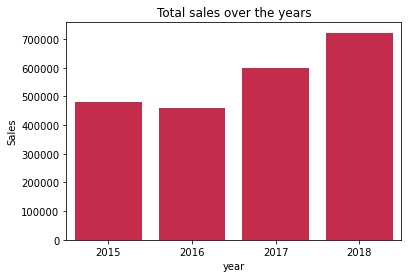

In [114]:
data_year=data.groupby('year').agg({'Sales': 'sum'}).reset_index()
ax= sns.barplot(x='year', y='Sales', data=data_year, color="crimson").set(title="Total sales over the years");

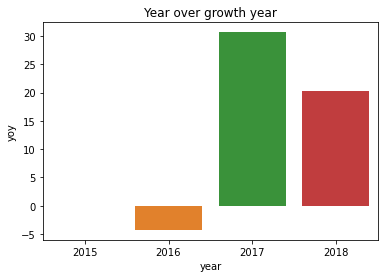

In [85]:
data_year['yoy'] = round(data_year['Sales'].pct_change()*100, 2)
sns.barplot(x='year', y='yoy', data=data_year).set(title="Year over growth year");
#It is the method to get the percentage change of chosen column.
#"yoy"= year over growth year

# Top customer of all times

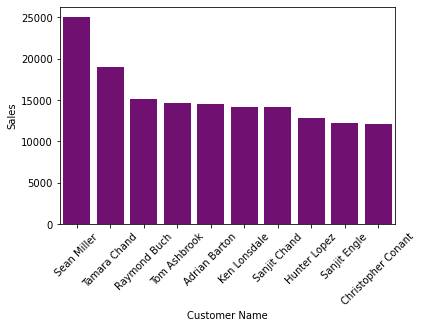

In [124]:
data_top_customer = data.groupby('Customer Name').agg({'Sales': 'sum'}).reset_index()
data_top_customer.sort_values(by='Sales',ascending=False, inplace=True)
sns.barplot(x='Customer Name', y='Sales', data=data_top_customer.head(10), color="purple");
plt.xticks(rotation=45);

# Top customers by years

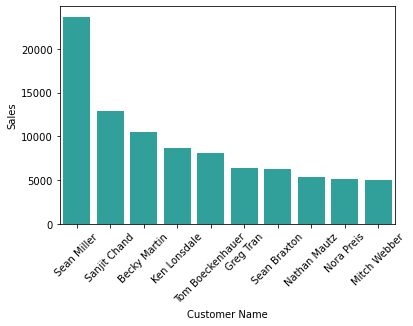

In [123]:
data_top_cust_year = data.groupby(['Customer Name', 'year']).agg({'Sales':'sum'}).reset_index()

#px.bar(data_top_cust_year[data_top_cust_year['year']== 2015], x='Customer Name', y='Sales',title='top customer 2015')
#Here, I filtered only the information of all sales in 2015.

data_top_cust_2015 = data_top_cust_year[data_top_cust_year['year']== 2015].sort_values(by='Sales', ascending=False)
sns.barplot(x='Customer Name', y='Sales', data=data_top_cust_2015.head(10), color="lightseagreen");
plt.xticks(rotation=45);

# Top cities

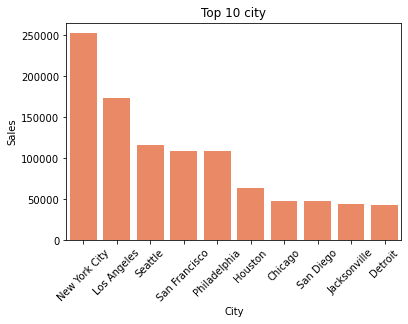

In [127]:
data_city = data.groupby(['City']).agg({'Sales': 'sum'}).reset_index()
data_city.sort_values(by='Sales', ascending=False, inplace=True)

sns.barplot(x='City', y='Sales', data=data_city.head(10), color="coral").set(title="Top 10 city");
plt.xticks(rotation=45);

# Regional Sales

In [65]:
data_region= data.groupby('Region').agg(sales_sum=('Sales','sum'), sales_mean=('Sales', 'mean')).reset_index()
#Since I want to look at the average and the sum of our sales column at the same time, I used tuples like this.


In [66]:
data_region

,Region,sales_sum,sales_mean
0,Central,492646.9132,216.357889
1,East,669518.7260,240.401697
2,South,389151.4590,243.524067
3,West,710219.6845,226.184613


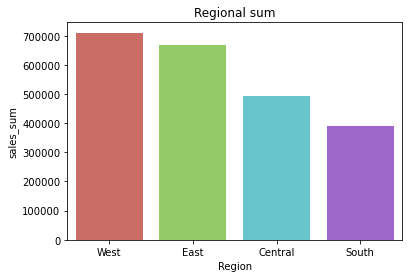

In [99]:
data_region.sort_values(by='sales_sum', ascending=False, inplace=True)
sns.barplot(x='Region', y='sales_sum', data=data_region,palette ="hls").set(title="Regional sum");


# Sales by category, subcategory and product

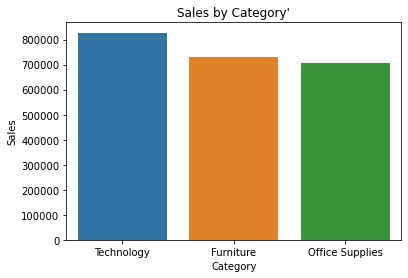

In [100]:
data_cat = data.groupby(['Category']).agg({'Sales':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
sns.barplot(x='Category', y='Sales', data=data_cat).set(title="Sales by Category'");

# Sub category

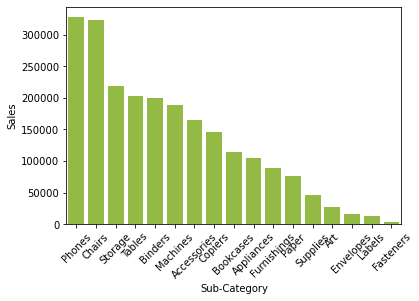

In [128]:
data_sub_cat = data.groupby(['Sub-Category']).agg({'Sales':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
sns.barplot(x='Sub-Category', y='Sales', data=data_sub_cat, color="yellowgreen")
plt.xticks(rotation=45);

 # Sales by product

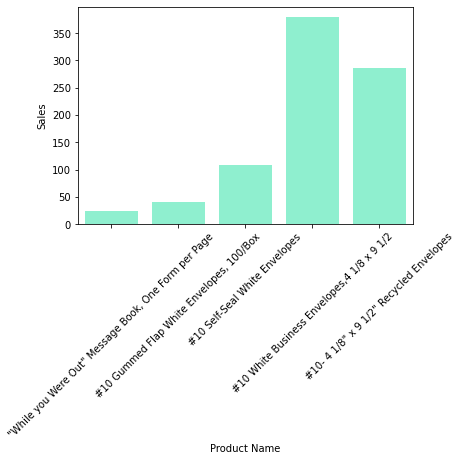

In [129]:
data_product = data.groupby(['Product Name']).agg({'Sales':'sum'}).reset_index()
sns.barplot(x='Product Name', y='Sales', data=data_product.head(5), color="aquamarine")
plt.xticks(rotation=45);

# Top products in each subcategory

In [39]:
data_top_prod = data.groupby(['Sub-Category', 'Product Name']).agg({'Sales':'sum'}).reset_index()
data_top_prod.sort_values(by=['Sales'], ascending=False, inplace=True)

In [40]:
data_top_prod.head()

,Sub-Category,Product Name,Sales
757,Copiers,Canon imageCLASS 2200 Advanced Copier,61599.824
483,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
1111,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480
702,Chairs,HON 5400 Series Task Chairs for Big and Tall,21870.576
495,Binders,GBC DocuBind TL300 Electric Binding System,19823.479


In [41]:
data_top_prod['rank'] =data_top_prod.groupby(['Sub-Category'])['Sales'].rank('dense',ascending=False)
#It is a method to get each sub-category number one product.

In [42]:
data_top_prod[data_top_prod['Sub-Category'] =='Machines']

,Sub-Category,Product Name,Sales,rank
1111,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,1.0
1119,Machines,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,2.0
1131,Machines,Lexmark MX611dhe Monochrome Laser Printer,16829.901,3.0
1097,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",14299.890,4.0
1112,Machines,Cubify CubeX 3D Printer Double Head Print,11099.963,5.0
...,...,...,...,...
1126,Machines,Hewlett-Packard Deskjet F4180 All-in-One Color...,101.994,59.0
1144,Machines,Penpower WorldCard Pro Card Scanner,91.475,60.0
1154,Machines,"Vtech AT&T CL2940 Corded Speakerphone, Black",71.976,61.0
1152,Machines,Texas Instrument TI-15 Fraction Calculator,41.905,62.0


In [43]:
data_top_prod[data_top_prod['Sub-Category'] =='Accessories']

,Sub-Category,Product Name,Sales,rank
114,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,10822.360,1.0
71,Accessories,Logitech P710e Mobile Speakerphone,10196.604,2.0
116,Accessories,Plantronics Savi W720 Multi-Device Wireless He...,9367.290,3.0
66,Accessories,Logitech diNovo Edge Keyboard,7399.704,4.0
74,Accessories,Logitech Z-906 Speaker sys - home theater - 5....,5609.830,5.0
...,...,...,...,...
124,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,25.960,143.0
78,Accessories,Maxell 4.7GB DVD-R 5/Pack,19.008,144.0
82,Accessories,Maxell CD-R Discs,15.760,145.0
97,Accessories,Memorex Mini Travel Drive 4 GB USB 2.0 Flash D...,13.616,146.0


In [44]:
px.bar(data_top_prod[data_top_prod['rank'] == 1], x='Product Name', y='Sales', color='Sub-Category', title='Top products in each sub category',width=1000, height=800, text_auto=True)

# Conclusion <a id="paragraph4"></a>
According to data visualization;

* Saturday and Thursday of the week are sales high on average.
* Monthly average sales is highest at January.
* Total sales is highest at 2018 but for year over growth year is at highest at 2017.
* Top customer for all times is Sean Miller who is in segment of Home Office.
* The highest sales by category is Technology. 
* New York has the highest sales then Los Angeles came. These are big and crowded city, for example it may be desirable to open another store in these city.
